In [1]:
def dataset(file):
    return"/home/shhsu/download/scClass_dataset/human_thymic_development/"+file

path_h5ad  = dataset('thymic_selected.h5ad')

In [2]:
import sys; sys.path.append("/home/shhsu/download/scClass_v2")
import scClass
from scClass.train import Model

In [3]:
import scanpy as sc
import pandas as pd
import numpy as np

In [4]:
adata = sc.read_h5ad(path_h5ad)
adata.obs_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
trans_table = np.array([
['B_memory',2],
['B_naive',3],
['B_plasma',4],
['B_pro/pre',-2],
['CD4+T',0],
['CD4+Tmem',0],
['CD8+T',1],
['CD8+Tmem',1],
['CD8αα',1],
['DC1',9],
['DC2',9],
['DN',-2],
['DP',-2],
['ETP',-2],
['Endo',-1],
['Ery',6],
['Fb_1',-1],
['Fb_2',-1],
['Fb_cycling',-1],
['ILC3',-2],
['Lymph',-2],
['Mac',-2],
['Mast',-2],
['Mgk',7],
['Mono',8],
['NK',5],
['NKT',-2],
['NMP',-2],
['T(agonist)',-2],
['TEC(myo)',-1],
['TEC(neuro)',-1],
['Treg',0],
['VSMC',-1],
['aDC',9],
['cTEC',-1],
['mTEC(I)',-1],
['mTEC(II)',-1],
['mTEC(III)',-1],
['mTEC(IV)',-1],
['mcTEC',-1],
['pDC',9],
['αβT(entry)',-2],
['γδT',-2],
])

In [6]:
s = np.isin(adata.obs['anno'],trans_table[:,0][trans_table[:,1]!='-2'])
adata = adata[s,:]

In [7]:
label = scClass.pp.get_type_id(adata,'anno',trans_table)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [26]:
adata = scClass.pp.transmodel(adata,gene='gene_names',gene_ref='Gene')

/home/shhsu/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


get gene seq...
0% 10% 21% 32% 43% 54% 65% 76% 87% 98% 
Of 45468 genes in the input file, 20303 were found in the training set of 20729 genes.
mapping to model...
0% 

In [9]:
adata = scClass.pp.preprocess(adata,filter=False,random=False,normalize=True)

normalizing data


In [10]:
model = scClass.load()
y_true = label['transfer_id'].values

loading model from:  /home/shhsu/download/scClass_v2/scClass/data/model_default.pkl


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]


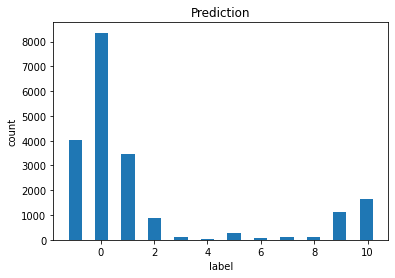

total acc: 77.29946127613306 %


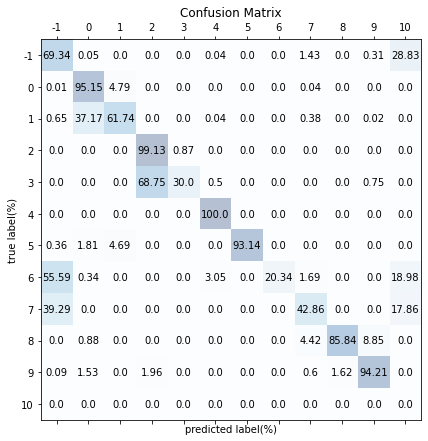

In [11]:
scClass.verify.threshold = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]
y_pred = scClass.predict(adata,model)
scClass.confusion_matrix(y_pred,y_true,filter=False)

In [14]:
Y_pred = np.array(y_pred[y_true>=-1])
Y_true = y_true[y_true>=-1]
accuary = (Y_pred==Y_true).sum()/Y_pred.shape[0]
from sklearn.metrics import *
precision = precision_score(Y_pred,Y_true,average=None)
precision = precision[precision>0].mean()
recall = recall_score(Y_pred,Y_true,average=None)
recall = recall[recall>0].mean()
f1 = f1_score(Y_pred,Y_true,average=None)
f1 = f1[f1>0].mean()
import pandas as pd
table = [
  ['accuary',accuary],
  ['precision',precision],
  ['recall',recall],
  ['f1-score',f1]
]
pd.DataFrame(table)

0         1
0    accuary  0.772995
1  precision  0.719783
2     recall  0.778551
3   f1-score  0.680702